In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

facetgrid serve as the backbone for catplot,relplot and displot .the idea behind it is creating small multiples it picks a categorical feature from data and create one plot for each and every category

In [2]:
pengs=sns.load_dataset('penguins')

In [3]:
pengs.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
sns.set_style('dark')

## BASICS

## 1. create  grid

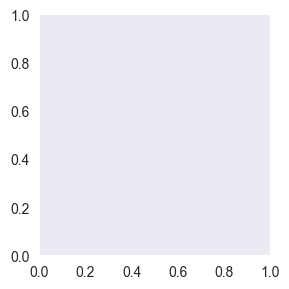

In [5]:
sns.FacetGrid(pengs)

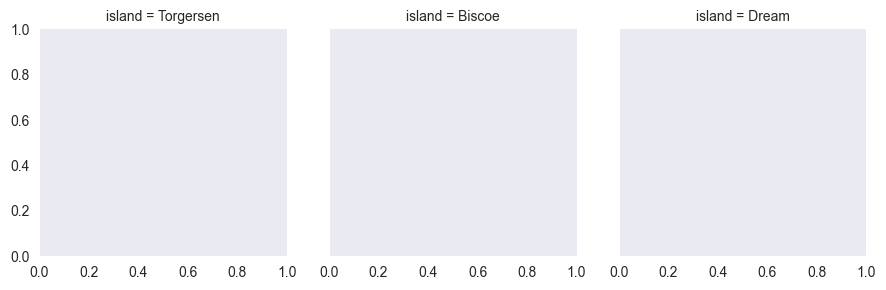

In [7]:
g=sns.FacetGrid(pengs,col='island')

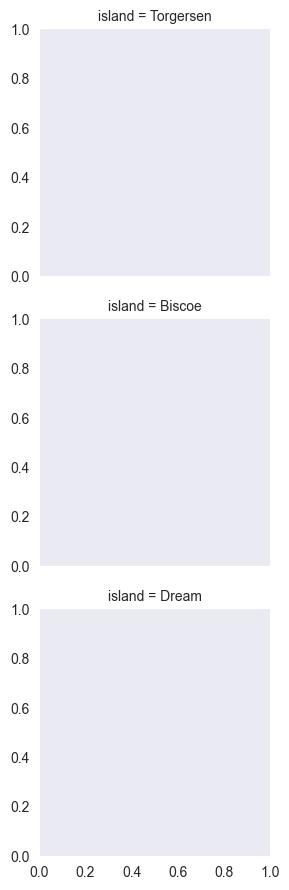

In [8]:
sns.FacetGrid(pengs,row='island')

In [9]:
type(g)

seaborn.axisgrid.FacetGrid

## 2. Map plot to axis 

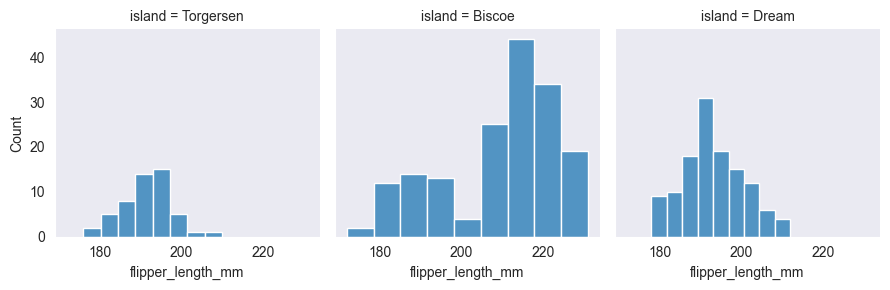

In [11]:
#creating hisplot
g=sns.FacetGrid(pengs,col='island')
g.map(sns.histplot,'flipper_length_mm')

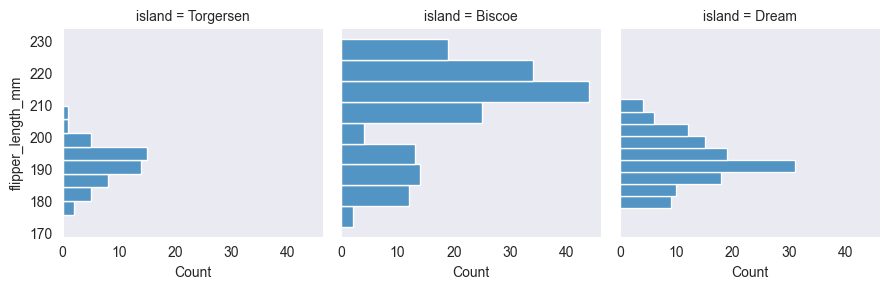

In [12]:
#using map_data frame
g=sns.FacetGrid(pengs,col='island')
g.map_dataframe(sns.histplot,y='flipper_length_mm')# it allows to sdd in x or y mapping

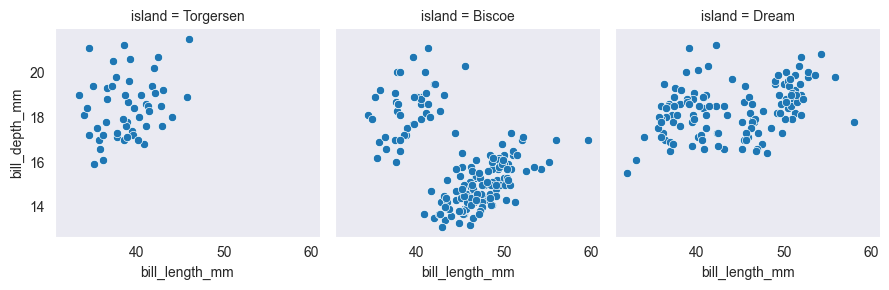

In [15]:
#scatterplot
g=sns.FacetGrid(pengs,col='island')
g.map_dataframe(sns.scatterplot,x='bill_length_mm',y='bill_depth_mm')# scatterplot require both axis

## 3. customize factgrid using methods and attributes

adding labels

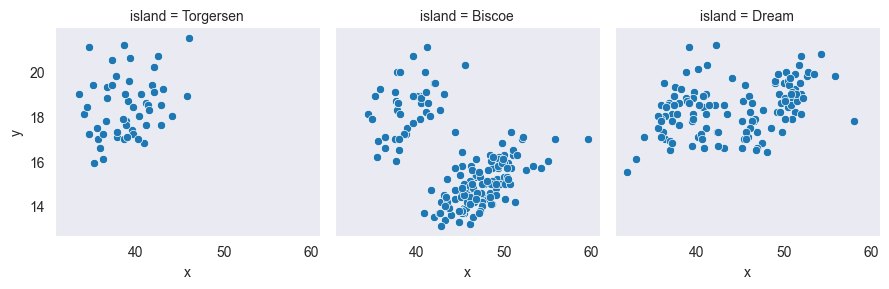

In [16]:
g=sns.FacetGrid(pengs,col='island')
g.map_dataframe(sns.scatterplot,x='bill_length_mm',y='bill_depth_mm')
g.set_axis_labels("x",'y')

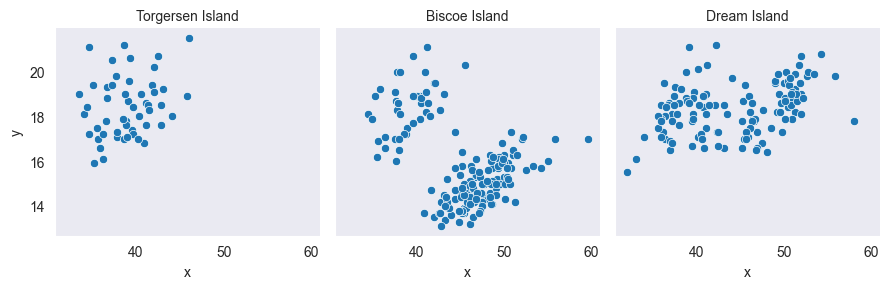

In [18]:
g=sns.FacetGrid(pengs,col='island')
g.map_dataframe(sns.scatterplot,x='bill_length_mm',y='bill_depth_mm')
g.set_axis_labels("x",'y')

# setting titles
g.set_titles(col_template='{col_name} Island') #{col_name} get corresponding category

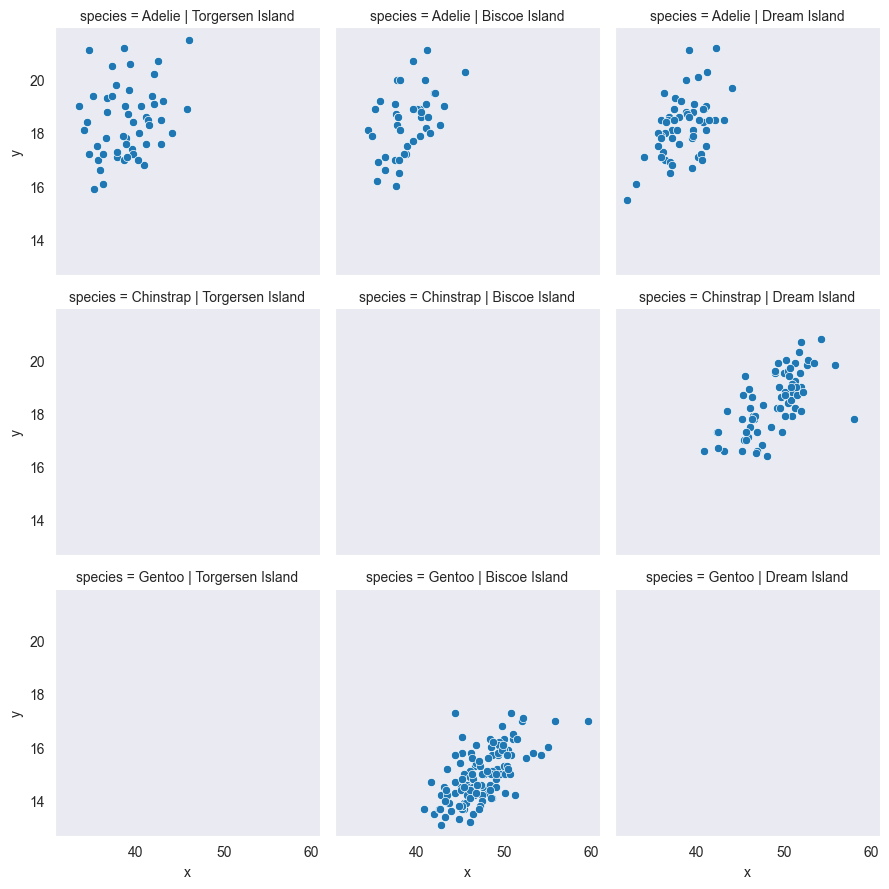

In [19]:
g=sns.FacetGrid(pengs,col='island',row='species')
g.map_dataframe(sns.scatterplot,x='bill_length_mm',y='bill_depth_mm')
g.set_axis_labels("x",'y')

# setting titles
g.set_titles(col_template='{col_name} Island')

sharey: provide axis for each plot
ylim: is to set limit of y axis

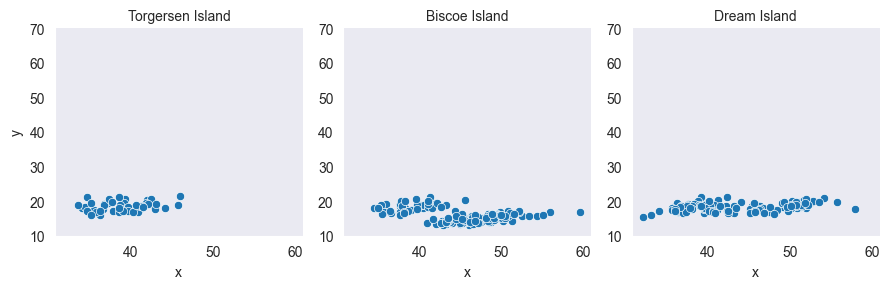

In [24]:

g=sns.FacetGrid(pengs,col='island',sharey=False,ylim=(10,70))
g.map_dataframe(sns.scatterplot,x='bill_length_mm',y='bill_depth_mm')
g.set_axis_labels("x",'y')

# setting titles
g.set_titles(col_template='{col_name} Island')

## hue

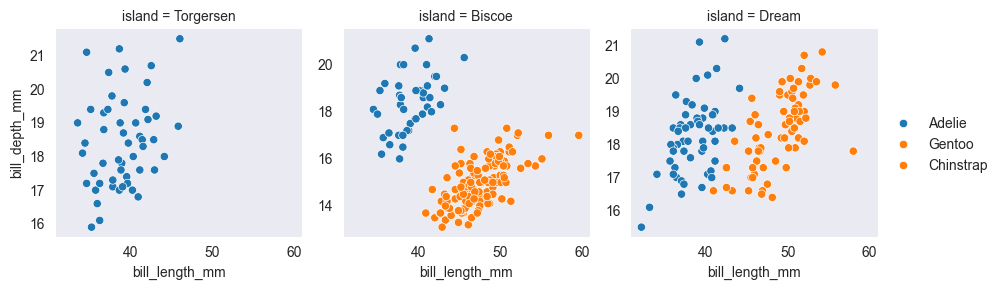

In [27]:
g=sns.FacetGrid(pengs,col='island',sharey=False)
g.map_dataframe(sns.scatterplot,x='bill_length_mm',y='bill_depth_mm',hue='species')
g.add_legend()

## palette

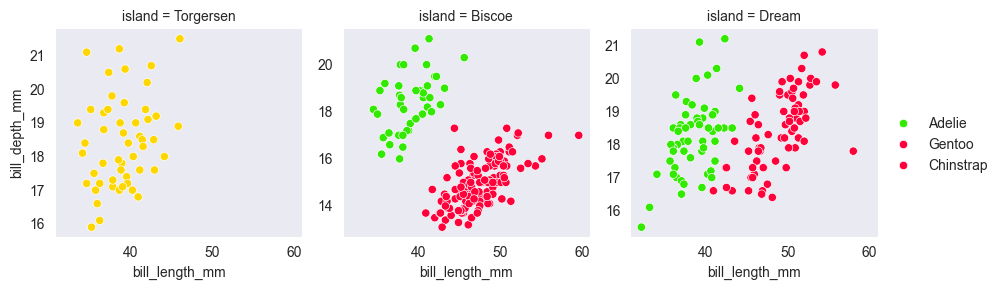

In [28]:
g=sns.FacetGrid(pengs,col='island',sharey=False)
g.map_dataframe(sns.scatterplot,x='bill_length_mm',y='bill_depth_mm',hue='species',palette='prism')
g.add_legend()


## Custom Functions

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will 

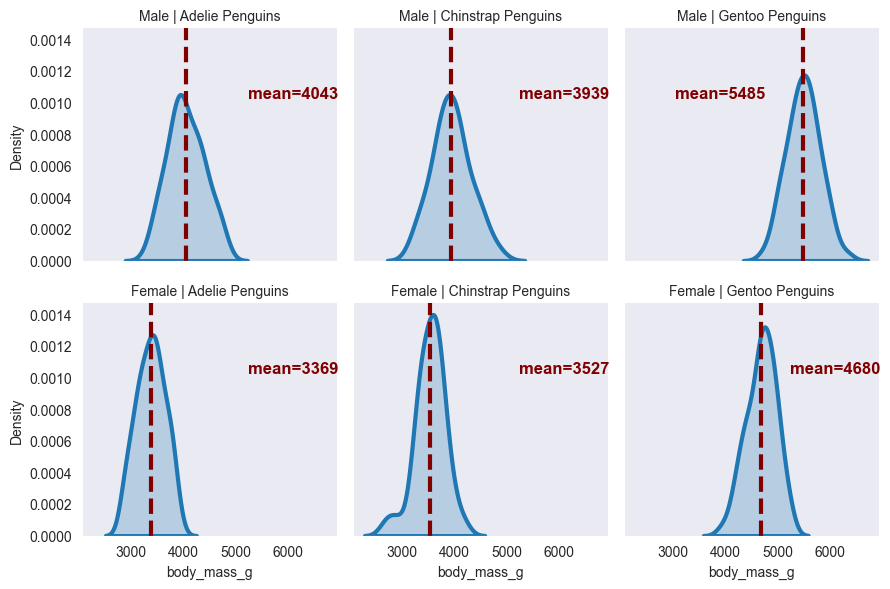

In [31]:
quantity='body_mass_g'

g = sns.FacetGrid(pengs, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
g.map_dataframe(add_mean_line, var=quantity)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');